In [ ]:
######################## 3 ###########################
import numpy as np
import matplotlib.pyplot as plt
def omp(A, y, s):
    """
    Implementation of OMP algorithm.
    """
    residual = y
    support = []
    for i in range(s):
        scores = np.abs(A.T @ residual)
        index = np.argmax(scores)
        support.append(index)
        x = np.zeros(A.shape[1])
        x[support] = np.linalg.pinv(A[:, support]) @ y
        residual = y - A @ x
        if np.linalg.norm(residual) < 1e-6:
            break
    x_omp = np.zeros(A.shape[1])
    for sp in support:
      x_omp[support]=x[support]
    return x_omp, support

def noiseless_phase_transition_omp(N, M_values, s):
    """
    Generate noiseless phase transition plot for OMP algorithm.
    """
    prob_recovery = np.zeros((1, len(M_values), s))
    # for n in range(len(N_values)):
    #     N = N_values[n]
    for m in range(len(M_values)):
        M = M_values[m]
        ##### Generating A #########
        A = np.random.normal(size=(M, N))
        A /= np.linalg.norm(A, axis=0)
        ############################
        for s in range(1, s+1):
            num_success = 0
            for i in range(2000):
                #x = generate_sparse_vector(N, s)
                ########### Generating x  ###############
                index=0
                support=np.zeros(s,dtype=int)
                while(index!=s):
                    gen=np.random.uniform(1,N)
                    if(int(gen) not in support):
                      support[index]=int(gen)
                      index+=1
                x=np.zeros(N)
                for j in support:
                  k=np.random.uniform(-10,11)
                  while(int(k)==0):
                    k=np.random.uniform(-10,11)
                  x[j]=k
                ####################################
                y = A @ x
                x_omp, support = omp(A, y, s)
                if set(support) == set(np.nonzero(x)[0]):
                    num_success += 1
            prob_recovery[0, m, s-1] = num_success / 2000
    return prob_recovery

# Define parameters
def solve_problem(n):
  N_values = n
  M_values = np.arange(1, n)
  s_max = int(n*7/20)

  # Generate noiseless phase transition plot for exact support recovery probability
  prob_recovery = noiseless_phase_transition_omp(N_values, M_values, s_max)

  # Plot the results as a 2D image
  # for n in range(len(N_values)):
      #N = N_values[n]
  N = N_values
  plt.imshow(prob_recovery[0], origin='lower', aspect='auto', cmap='gray_r', extent=[1, M_values[-1], 1, s_max])
  plt.colorbar()
  plt.title(f"Noiseless phase transition plot for N = {N}")
  plt.xlabel("Number of measurements (M)")
  plt.ylabel("Sparsity level (s)")
  plt.show()

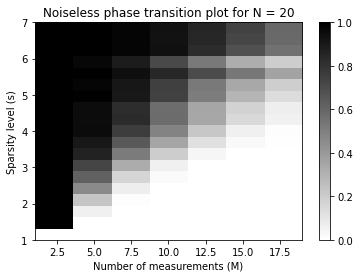

In [ ]:
solve_problem(20)

In [ ]:
################## 4a ########################
import numpy as np
import matplotlib.pyplot as plt

# OMP algorithm
def omp(A, y, s):
    """
    Implementation of OMP algorithm.
    """
    residual = y
    support = []
    for i in range(s):
        scores = np.abs(A.T @ residual)
        index = np.argmax(scores)
        support.append(index)
        x = np.zeros(A.shape[1])
        x[support] = np.linalg.pinv(A[:, support]) @ y
        residual = y - A @ x
        if np.linalg.norm(residual) < 1e-3:
            break
    x_omp = np.zeros(A.shape[1])
    for sp in support:
      x_omp[support]=x[support]
    return x_omp
# Generate noisy phase transition plot
N_list = [20]
sigma_list = [0.5, 5]
s=7
num_trials = 2000
success_rate = np.zeros((1, 8))

for i, N in enumerate(N_list):
    for j in range(num_trials):
        # Generate random sparse signal x
        support=np.zeros(s,dtype=int)
        index=0
        while(index!=s):
            gen=np.random.uniform(1,N)
            if(int(gen) not in support):
              support[index]=int(gen)
              index+=1
        x=np.zeros(N)
        for j in support:
          k=np.random.uniform(-10,11)
          while(int(k)==0):
            k=np.random.uniform(-10,11)
          x[j]=k
        # Generate random measurement matrix A with normalized columns
        A = np.random.randn(N, N)
        A /= np.linalg.norm(A, axis=0)

        # Generate noise vector n
        n = np.random.normal(loc=0, scale=sigma, size=N)

        # Generate noisy measurements y
        y = np.dot(A, x) + n

        # Run OMP to recover sparse signal
        x_hat = omp(A, y, s)

        # Compute success rate
        error = np.linalg.norm(x - x_hat) / np.linalg.norm(x)
        if error < 1e-3:
            success_rate[i, s] += 1
        for s in range(s):
            if len(np.where(x_hat)[0]) == s:
                success_rate[i, s] += 1

    # Normalize success rate by number of trials and plot
    success_rate[i] /= num_trials
    plt.imshow(success_rate[i, :].reshape((1, -1)), cmap='gray_r', aspect='auto',
               extent=[0, s, N_list[i]+0.5, 0.5])
    plt.xlabel('Sparsity (s)')
    plt.ylabel('Number of Measurements (M)')
    plt.title('Noisy Phase Transition Plot (N = {}, sigma = {})'.format(N_list[i], sigma_list[k]))
    plt.colorbar()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def omp(A, y, s):
    """
    Implementation of OMP algorithm.
    """
    residual = y
    support = []
    for i in range(s):
        scores = np.abs(A.T @ residual)
        index = np.argmax(scores)
        support.append(index)
        x = np.zeros(A.shape[1])
        x[support] = np.linalg.pinv(A[:, support]) @ y
        residual = y - A @ x
        if np.linalg.norm(residual) < 1e-3:
            break
    x_omp = np.zeros(A.shape[1])
    for sp in support:
      x_omp[support]=x[support]
    return x_omp, support

def noiseless_phase_transition_omp(N, M_values, s,sigma):
    """
    Generate noiseless phase transition plot for OMP algorithm.
    """
    prob_recovery = np.zeros((1, len(M_values), s))
    # for n in range(len(N_values)):
    #     N = N_values[n]
    for m in range(len(M_values)):
        M = M_values[m]
        ##### Generating A #########
        A = np.random.normal(size=(M, N))
        A /= np.linalg.norm(A, axis=0)
        ############################
        for s in range(1, s+1):
            num_success = 0
            for i in range(2000):
                #x = generate_sparse_vector(N, s)
                ########### Generating x  ###############
                index=0
                support=np.zeros(s,dtype=int)
                while(index!=s):
                    gen=np.random.uniform(1,N)
                    if(int(gen) not in support):
                      support[index]=int(gen)
                      index+=1
                x=np.zeros(N)
                for j in support:
                  k=np.random.uniform(-10,11)
                  while(int(k)==0):
                    k=np.random.uniform(-10,11)
                  x[j]=k
                ####################################
                n = np.random.normal(loc=0, scale=sigma, size=M)
                y = A@x+n
                x_omp, support = omp(A, y, s)
                if set(support) == set(np.nonzero(x)[0]):
                    num_success += 1
            prob_recovery[0, m, s-1] = num_success / 2000
    return prob_recovery

# Define parameters
def solve_problem(n,sigma):
  N_values = n
  M_values = np.arange(1, n)
  s_max = int(n*7/20)

  # Generate noiseless phase transition plot for exact support recovery probability
  prob_recovery = noiseless_phase_transition_omp(N_values, M_values, s_max,sigma)

  # Plot the results as a 2D image
  # for n in range(len(N_values)):
      #N = N_values[n]
  N = N_values
  plt.imshow(prob_recovery[0], origin='lower', aspect='auto', cmap='gray_r', extent=[1, M_values[-1], 1, s_max])
  plt.colorbar()
  plt.title(f"Noiseless phase transition plot for N = {N}")
  plt.xlabel("Number of measurements (M)")
  plt.ylabel("Sparsity level (s)")
  plt.show()

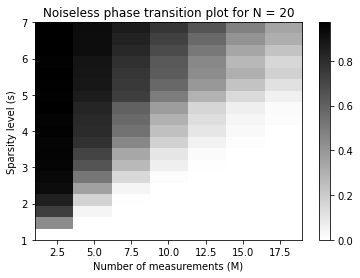

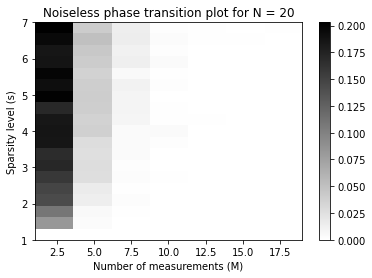

In [ ]:
sigma1=0.5
sigma2=5
n1=20
solve_problem(n1,sigma1)
solve_problem(n1,sigma2)

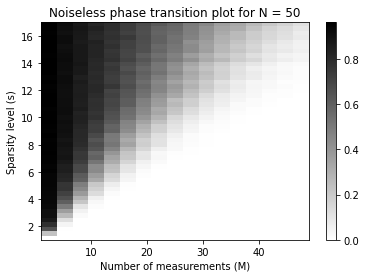

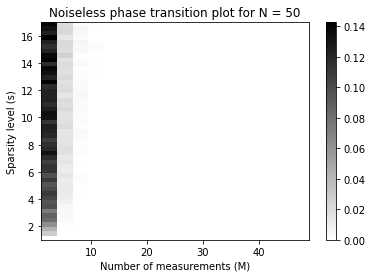

In [ ]:
n2=50
sigma1=0.5
sigma2=5
solve_problem(n2,sigma1)
solve_problem(n2,sigma2)

In [ ]:
########## 4b #####################
import numpy as np
import matplotlib.pyplot as plt
def omp(A, y, s,n):
    """
    Implementation of OMP algorithm.
    """
    residual = y
    support = []
    i=0
    while(i<s):
        scores = np.abs(A.T @ residual)
        index = np.argmax(scores)
        support.append(index)
        x = np.zeros(A.shape[1])
        x[support] = np.linalg.pinv(A[:, support]) @ y
        residual = y - A @ x
        if np.linalg.norm(residual) <= np.linalg.norm(n):
            break
        i+=1
    x_omp = np.zeros(A.shape[1])
    for sp in support:
      x_omp[support]=x[support]
    return x_omp, support

def noiseless_phase_transition_omp(N, M_values, s,sigma):
    """
    Generate noiseless phase transition plot for OMP algorithm.
    """
    prob_recovery = np.zeros((1, len(M_values), s))
    # for n in range(len(N_values)):
    #     N = N_values[n]
    for m in range(len(M_values)):
        M = M_values[m]
        ##### Generating A #########
        A = np.random.normal(size=(M, N))
        A /= np.linalg.norm(A, axis=0)
        ############################
        for s in range(1, s+1):
            num_success = 0
            for i in range(2000):
                #x = generate_sparse_vector(N, s)
                ########### Generating x  ###############
                index=0
                support=np.zeros(s,dtype=int)
                while(index!=s):
                    gen=np.random.uniform(1,N)
                    if(int(gen) not in support):
                      support[index]=int(gen)
                      index+=1
                x=np.zeros(N)
                for j in support:
                  k=np.random.uniform(-10,11)
                  while(int(k)==0):
                    k=np.random.uniform(-10,11)
                  x[j]=k
                ####################################
                n = np.random.normal(loc=0, scale=sigma, size=M)
                y = A@x+n
                x_omp, support = omp(A, y, s,n)
                if set(support) == set(np.nonzero(x)[0]):
                    num_success += 1
            prob_recovery[0, m, s-1] = num_success / 2000
    return prob_recovery

# Define parameters
def solve_problem_4b(n,sigma):
  N_values = n
  M_values = np.arange(1, n)
  s_max = int(n*7/20)

  # Generate noiseless phase transition plot for exact support recovery probability
  prob_recovery = noiseless_phase_transition_omp(N_values, M_values, s_max,sigma)

  # Plot the results as a 2D image
  # for n in range(len(N_values)):
      #N = N_values[n]
  N = N_values
  plt.imshow(prob_recovery[0], origin='lower', aspect='auto', cmap='gray_r', extent=[1, M_values[-1], 1, s_max])
  plt.colorbar()
  plt.title(f"Noiseless phase transition plot for N={N} and sigma={sigma}")
  plt.xlabel("Number of measurements (M)")
  plt.ylabel("Sparsity level (s)")
  plt.show()

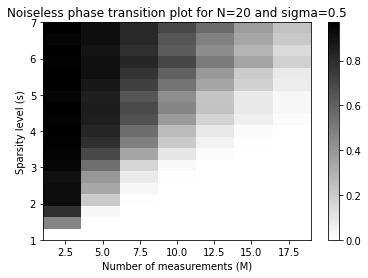

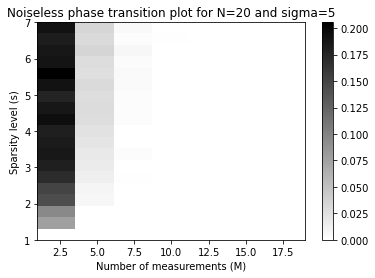

In [ ]:
sigma1=0.5
sigma2=5
n1=20
solve_problem_4b(n1,sigma1)
solve_problem_4b(n1,sigma2)

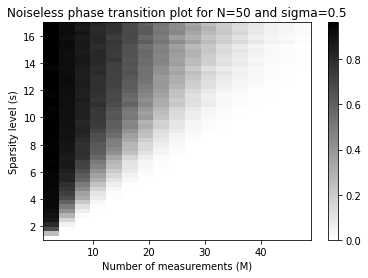

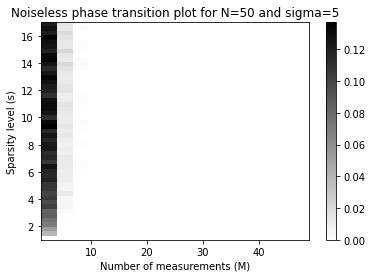

In [ ]:
sigma1=0.5
sigma2=5
n2=50
solve_problem_4b(n2,sigma1)
solve_problem_4b(n2,sigma2)

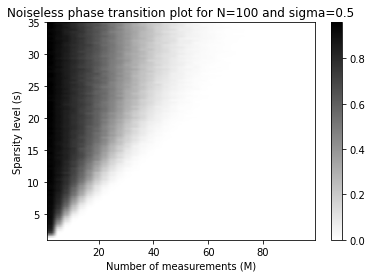

In [ ]:
sigma1=0.5
sigma2=5
n3=100
solve_problem_4b(n3,sigma1)